<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/0%20Math%20Fondamental/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy import optimize

## Univariate function

An univariate function is a function that has one independent variable, for example there is a function:

$f(x) = 2x^2 + x + 1$

The purpose of the gradient descent is to find minima of the function.

$\underset{x}{\min}f(x)$

The gradient function is actually the derivative of the function:

$\nabla f(x) = \frac{d}{dx}f(x)$


The gradient descent rule is:

$x = x - \alpha \nabla f(x) = x - \alpha\frac{d}{dx}f(x)$

It's a iterative process, each time the $x$ is moved to a 

In [2]:
def function(x):
    return 2*x**2 + x + 1

def gradient(x):
    return derivative(function, x)
    # return (4*x + 1)

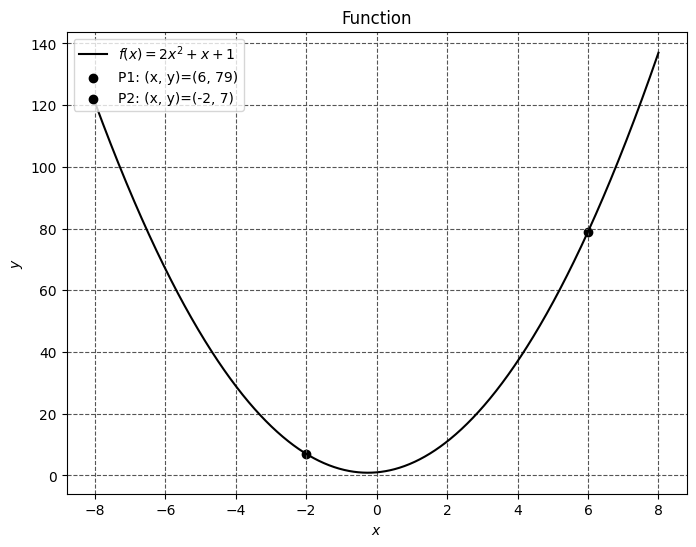

In [3]:
x = np.linspace(-8, 8, 1000)
y = function(x)

fig = plt.figure(figsize=(8,6))
plt.plot(x, y, color='k', label='$f(x)=2x^2+x+1$')
x1, x2 = 6, -2
plt.scatter(x1, function(x1), color='k', label='P1: (x, y)=(%d, %d)'%(x1,function(x1)))
plt.scatter(x2, function(x2), color='k', label='P2: (x, y)=(%d, %d)'%(x2,function(x2)))
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('$x$')
plt.ylabel("$y$")
plt.legend(loc='upper left')
plt.title('Function')
plt.savefig("gradient_decent.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [4]:
cur_x = -2.0
prev_x = 0
alpha = 0.01
epsilon = 1e-6
max_iters = 10000
iters = 0
x_value = [] 
iteration = [] 

while abs(cur_x - prev_x) > epsilon and iters < max_iters:
    x_value.append(cur_x)
    iteration.append(iters)
    prev_x = cur_x 
    cur_x = cur_x - alpha * gradient(prev_x)
    iters = iters+1   
    # print("Iteration",iters,"--> X =",cur_x) 
    
print("The minima at", cur_x)
print("Minima of function", function(cur_x))
print("Iterations", iters)

The minima at -0.2500233145552139
Minima of function 0.8750000010871369
Iterations 275


<ipython-input-2-c512911f9bc5>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(function, x)


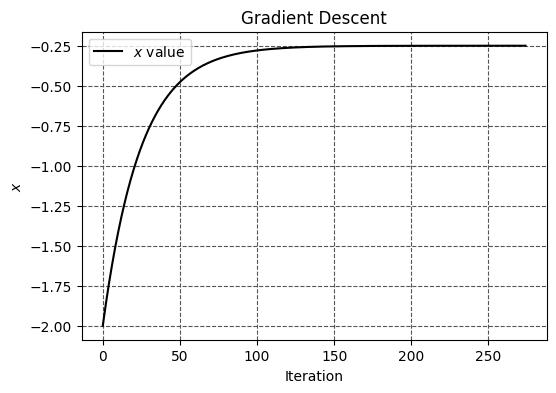

In [5]:
fig = plt.figure(figsize=(6,4))
plt.plot(iteration, x_value, color='k', label="$x$ value")
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel("$x$")
plt.legend(loc='best')
plt.title('Gradient Descent')
plt.savefig("gradient_decent2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

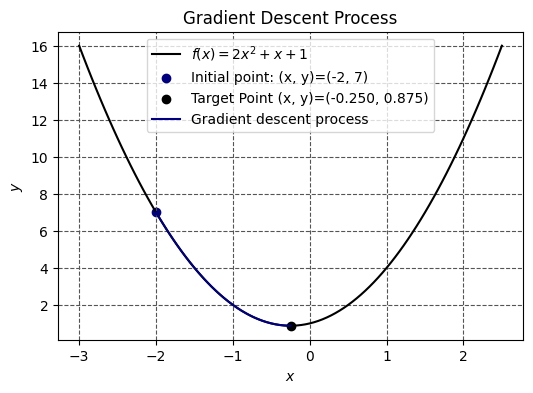

In [6]:
x = np.linspace(-3.0, 2.5, 100)
y = function(x)
x_gd = np.array(x_value)

fig = plt.figure(figsize=(6,4))
plt.plot(x, y, color='k', label='$f(x)=2x^2+x+1$')
plt.scatter(x_gd[0], function(x_gd[0]), color='navy', label='Initial point: (x, y)=(%d, %d)'%(x_gd[0],function(x_gd[0])))
plt.scatter(x_gd[-1], function(x_gd[-1]), color='k', label='Target Point (x, y)=(%.3f, %.3f)'%(x_gd[-1],function(x_gd[-1])))
plt.plot(x_gd, function(x_gd), color='navy', label="Gradient descent process")
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('$x$')
plt.ylabel("$y$")
plt.legend(loc='upper center')
plt.title('Gradient Descent Process')
plt.savefig("gradient_decent3.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [7]:
x0 = -2.0
epsilon = 1e-6
minima = optimize.minimize(function, 
                           x0, 
                           method = 'CG', 
                           #  jac = gradient,
                           tol=epsilon)
print(minima.message)
print(minima.fun)
print(minima.x)
minima

Optimization terminated successfully.
0.8750000000000004
[-0.25000002]


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.8750000000000004
       x: [-2.500e-01]
     nit: 1
     jac: [-2.980e-08]
    nfev: 6
    njev: 3

## Multivariate Function



https://towardsdatascience.com/machine-learning-bit-by-bit-multivariate-gradient-descent-e198fdd0df85


Function:

$f(x_1, x_2) = \large\frac{1}{2}x_1^2 + x_2^2 + x_1 + x_2$

The purpose of gradient descent is to find minima of the function.

$\underset{x_1, x_2}{\min}f(x_1, x_2)$

The gradient for multivariate function is a vector of the partial derivative of each variable of the function:

$\nabla f(x) = \begin{bmatrix}
\frac{\partial }{\partial x_1}f(x_1, x_2, ... , x_n) \\
\frac{\partial }{\partial x_2}f(x_1, x_2, ... , x_n) \\
... \\
\frac{\partial }{\partial x_n}f(x_1, x_2, ... , x_n)
\end{bmatrix}$

The symbol ${\partial }$ is partial derivative.


For this example of two variables, the gradient is:

$\nabla f(x_1, x_2) = \begin{bmatrix}
\frac{\partial }{\partial x_1}f(x_1, x_2) \\
\frac{\partial }{\partial x_2}f(x_1, x_2)
\end{bmatrix}$

The gradient descent rule is:

$x = x - \alpha \nabla f(x_1, x_2)$

which means:

$x_1 = x_1 - \alpha\Large\frac{\partial }{\partial x_1}f(x_1, x_2)$

$x_2 = x_2 - \alpha\Large\frac{\partial }{\partial x_2}f(x_1, x_2)$




In [8]:
def multivariate_function(x):
    x1, x2 = x
    return 0.5*x1**2 + x2**2 + x1 + x2

def multivariate_gradient(x):
    grad = np.empty(len(x))
    grad[0] = x[0] + 1
    grad[1] = 2*x[1] + 1
    return grad

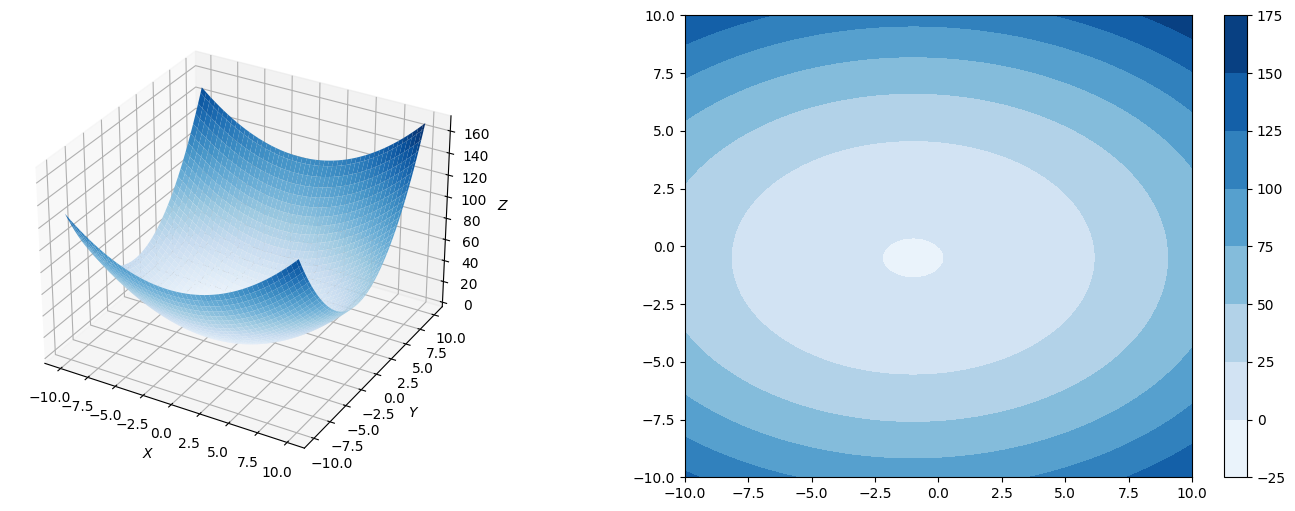

In [9]:
from mpl_toolkits import mplot3d

plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox'] = 'tight'  

sample = 100
x1 = np.linspace(-10, 10, sample)
x2 = np.linspace(-10, 10, sample)
x1, x2 = np.meshgrid(x1, x2)
z = multivariate_function([x1, x2])

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x1, x2, z, cmap='Blues', linewidth=0)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.axis('on')

plt.subplot(1, 2, 2)
plt.contourf(x1, x2, z, cmap='Blues')
plt.colorbar()
plt.show()
# fig.savefig("function_normal2d.png", dpi=100, format="png", transparent=True)

Run gradient descent:

In [10]:
cur_x = np.array([2, -2])
prev_x = np.zeros(len(cur_x))
alpha = 0.01
epsilon = 1e-6
max_iters = 10000 
iters = 0 
x1_value, x2_value, iteration = [], [], [] 

while abs(cur_x[0] - prev_x[0]) > epsilon and iters < max_iters:
    x1_value.append(cur_x[0])
    x2_value.append(cur_x[1])
    iteration.append(iters)
    prev_x = cur_x 
    cur_x = cur_x - alpha * multivariate_gradient(prev_x)
    iters = iters+1   
    # print("Iteration",iters,"--> X =",cur_x) 
    
print("The minima at", cur_x)
print("Minima of function", multivariate_function(cur_x))
print("Iterations", iters)

The minima at [-0.99990127 -0.5       ]
Minima of function -0.7499999951258126
Iterations 1027


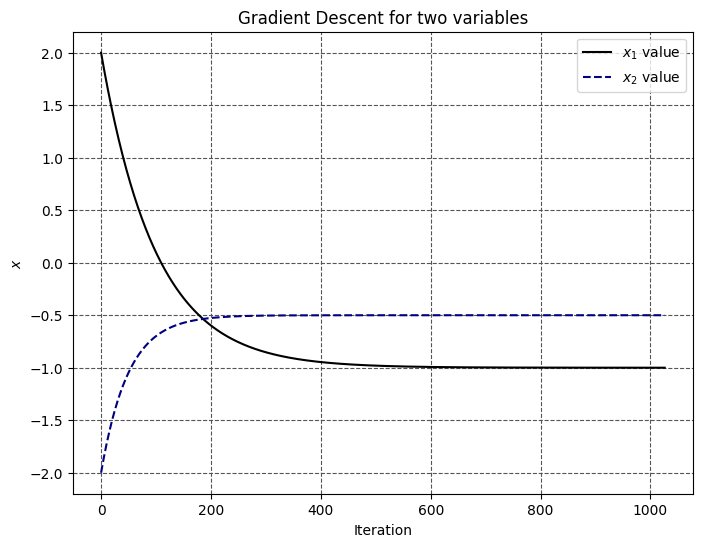

In [11]:
fig = plt.figure(figsize=(8,6))
plt.title('Gradient Descent for two variables')

plt.plot(iteration, x1_value, color='k', label="$x_1$ value")
plt.plot(iteration, x2_value, color='navy', label="$x_2$ value", ls='--')
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel("$x$")
plt.legend(loc='upper right')
plt.savefig("gradient_decent4.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

scypy.optimize.minimize() function:

In [12]:
x0 = (2.0, -2.0)
result = optimize.minimize(multivariate_function, 
                           x0, 
                           method='CG', 
                           tol=epsilon)
print(result.message)
print(result.fun)
print(result.x)
result

Optimization terminated successfully.
-0.7499999999999969
[-1.00000005 -0.49999996]


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.7499999999999969
       x: [-1.000e+00 -5.000e-01]
     nit: 2
     jac: [-4.470e-08  8.941e-08]
    nfev: 15
    njev: 5